In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
#random.seed(42)
#np.random.seed(42)
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("study2data.csv", index_col=0)

# Average

In [4]:
N_samp = 50
N_exp = 10000

J_AVG = {err: {str(s): 0.0 for s in range(1,N_samp+1)} for err in ["MAE", "MSE", "RMSE"]}
B_AVG = {err: {str(s): 0.0 for s in range(1,N_samp+1)} for err in ["MAE", "MSE", "RMSE"]}

for i in tqdm(range(1,N_samp+1)):

    judgement_AbsE = []
    belief_AbsE = []
    judgement_SE = []
    belief_SE = []

    for exp in range(N_exp):
        
        J_Q = []
        B_Q = []
        for Qnum in ["1", "2", "4", "5"]:
            true_mean = data["Q{}_1".format(Qnum)].mean()
            J_sample = np.random.choice(data["Q{}_1".format(Qnum)].values,i)
            B_sample = np.random.choice(data["Q{}_midpoint".format(Qnum)].values,i)
            
            J_E_Q = true_mean-J_sample.mean()
            B_E_Q = true_mean-B_sample.mean()
            J_Q.append(J_E_Q)
            B_Q.append(B_E_Q)
        
        
        judgement_AbsE.append(np.mean([np.abs(j) for j in J_Q]))
        belief_AbsE.append(np.mean([np.abs(j) for j in B_Q]))
        judgement_SE.append(np.mean([j**2 for j in J_Q]))
        belief_SE.append(np.mean([j**2 for j in B_Q]))
    
    # mean absolute error
    J_MAE = np.mean(judgement_AbsE)
    B_MAE = np.mean(belief_AbsE)
    J_AVG["MAE"][str(i)] = J_MAE
    B_AVG["MAE"][str(i)] = B_MAE
    
    # mean squared error
    J_MSE = np.mean(judgement_SE)
    B_MSE = np.mean(belief_SE)
    J_AVG["MSE"][str(i)] = J_MSE 
    B_AVG["MSE"][str(i)] = B_MSE

    # root mean squared error
    J_RMSE = np.sqrt(np.mean(judgement_SE))
    B_RMSE = np.sqrt(np.mean(belief_SE))
    J_AVG["RMSE"][str(i)] = J_RMSE
    B_AVG["RMSE"][str(i)] = B_RMSE

            

100%|██████████| 50/50 [10:34<00:00, 12.69s/it]


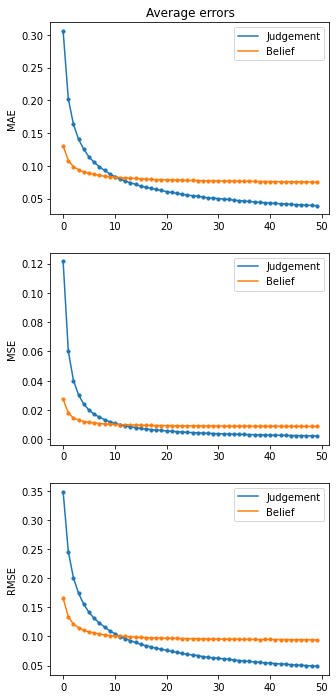

In [5]:
fig, ax = plt.subplots(3,1, figsize=(5,12))
for i, error_metric in enumerate(["MAE", "MSE", "RMSE"]):
    J_avg = list(J_AVG[error_metric].values())

    B_avg = list(B_AVG[error_metric].values())

    ax[i].plot(np.arange(50),J_avg, label="Judgement")
    ax[i].plot(np.arange(50),B_avg, label="Belief")
    ax[i].scatter(np.arange(50),J_avg,s=10)
    ax[i].scatter(np.arange(50),B_avg,s=10)
    ax[i].set_ylabel(error_metric)
    ax[i].legend()
ax[0].set_title("Average errors")

plt.savefig("average.pdf")

## average but sampling from biased sample(s)

In [5]:

N_samp = 50
N_exp = 1000

J_AVG = {err: {str(s): 0.0 for s in range(1,N_samp+1)} for err in ["MAE", "MSE", "RMSE"]}
B_AVG = {err: {str(s): 0.0 for s in range(1,N_samp+1)} for err in ["MAE", "MSE", "RMSE"]}

for i in tqdm(range(1,N_samp+1)):

    judgement_AbsE = []
    belief_AbsE = []
    judgement_SE = []
    belief_SE = []

    for exp in range(N_exp):
        
        J_Q = []
        B_Q = []
        for Qnum in ["1", "2", "4", "5"]:
            true_mean = data["Q{}_1".format(Qnum)].mean()
            J_sample = np.random.choice(data[data.polAffil=="Republican"]["Q{}_1".format(Qnum)].values,i)
            B_sample = np.random.choice(data[data.polAffil=="Republican"]["Q{}_midpoint".format(Qnum)].values,i)
            
            J_E_Q = true_mean-J_sample.mean()
            B_E_Q = true_mean-B_sample.mean()
            J_Q.append(J_E_Q)
            B_Q.append(B_E_Q)
        
        
        judgement_AbsE.append(np.mean([np.abs(j) for j in J_Q]))
        belief_AbsE.append(np.mean([np.abs(j) for j in B_Q]))
        judgement_SE.append(np.mean([j**2 for j in J_Q]))
        belief_SE.append(np.mean([j**2 for j in B_Q]))
    
    # mean absolute error
    J_MAE = np.mean(judgement_AbsE)
    B_MAE = np.mean(belief_AbsE)
    J_AVG["MAE"][str(i)] = J_MAE
    B_AVG["MAE"][str(i)] = B_MAE
    
    # mean squared error
    J_MSE = np.mean(judgement_SE)
    B_MSE = np.mean(belief_SE)
    J_AVG["MSE"][str(i)] = J_MSE 
    B_AVG["MSE"][str(i)] = B_MSE

    # root mean squared error
    J_RMSE = np.sqrt(np.mean(judgement_SE))
    B_RMSE = np.sqrt(np.mean(belief_SE))
    J_AVG["RMSE"][str(i)] = J_RMSE
    B_AVG["RMSE"][str(i)] = B_RMSE

100%|██████████| 50/50 [05:24<00:00,  6.48s/it]


Text(0.5, 1.0, 'Average errors')

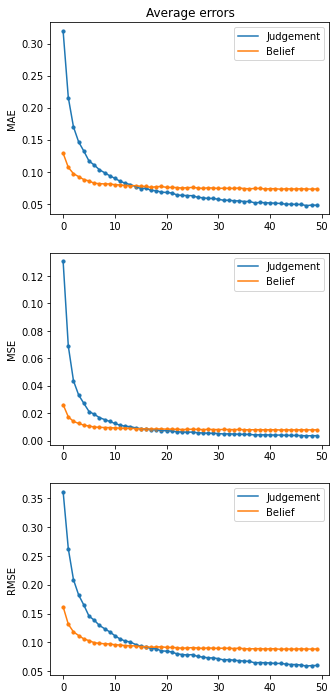

In [6]:
fig, ax = plt.subplots(3,1, figsize=(5,12))
for i, error_metric in enumerate(["MAE", "MSE", "RMSE"]):
    J_avg = list(J_AVG[error_metric].values())

    B_avg = list(B_AVG[error_metric].values())

    ax[i].plot(np.arange(50),J_avg, label="Judgement")
    ax[i].plot(np.arange(50),B_avg, label="Belief")
    ax[i].scatter(np.arange(50),J_avg,s=10)
    ax[i].scatter(np.arange(50),B_avg,s=10)
    ax[i].set_ylabel(error_metric)
    ax[i].legend()
ax[0].set_title("Average errors")

In [7]:

N_samp = 50
N_exp = 1000

J_AVG = {err: {str(s): 0.0 for s in range(1,N_samp+1)} for err in ["MAE", "MSE", "RMSE"]}
B_AVG = {err: {str(s): 0.0 for s in range(1,N_samp+1)} for err in ["MAE", "MSE", "RMSE"]}

for i in tqdm(range(1,N_samp+1)):

    judgement_AbsE = []
    belief_AbsE = []
    judgement_SE = []
    belief_SE = []

    for exp in range(N_exp):
        
        J_Q = []
        B_Q = []
        for Qnum in ["1", "2", "4", "5"]:
            true_mean = data["Q{}_1".format(Qnum)].mean()
            J_sample = np.random.choice(data[data.polAffil=="Democrat"]["Q{}_1".format(Qnum)].values,i)
            B_sample = np.random.choice(data[data.polAffil=="Democrat"]["Q{}_midpoint".format(Qnum)].values,i)
            
            J_E_Q = true_mean-J_sample.mean()
            B_E_Q = true_mean-B_sample.mean()
            J_Q.append(J_E_Q)
            B_Q.append(B_E_Q)
        
        
        judgement_AbsE.append(np.mean([np.abs(j) for j in J_Q]))
        belief_AbsE.append(np.mean([np.abs(j) for j in B_Q]))
        judgement_SE.append(np.mean([j**2 for j in J_Q]))
        belief_SE.append(np.mean([j**2 for j in B_Q]))
    
    # mean absolute error
    J_MAE = np.mean(judgement_AbsE)
    B_MAE = np.mean(belief_AbsE)
    J_AVG["MAE"][str(i)] = J_MAE
    B_AVG["MAE"][str(i)] = B_MAE
    
    # mean squared error
    J_MSE = np.mean(judgement_SE)
    B_MSE = np.mean(belief_SE)
    J_AVG["MSE"][str(i)] = J_MSE 
    B_AVG["MSE"][str(i)] = B_MSE

    # root mean squared error
    J_RMSE = np.sqrt(np.mean(judgement_SE))
    B_RMSE = np.sqrt(np.mean(belief_SE))
    J_AVG["RMSE"][str(i)] = J_RMSE
    B_AVG["RMSE"][str(i)] = B_RMSE

100%|██████████| 50/50 [05:34<00:00,  6.69s/it]


Text(0.5, 1.0, 'Average errors')

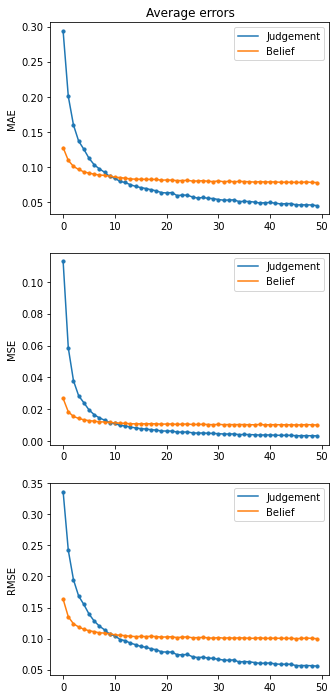

In [8]:
fig, ax = plt.subplots(3,1, figsize=(5,12))
for i, error_metric in enumerate(["MAE", "MSE", "RMSE"]):
    J_avg = list(J_AVG[error_metric].values())

    B_avg = list(B_AVG[error_metric].values())

    ax[i].plot(np.arange(50),J_avg, label="Judgement")
    ax[i].plot(np.arange(50),B_avg, label="Belief")
    ax[i].scatter(np.arange(50),J_avg,s=10)
    ax[i].scatter(np.arange(50),B_avg,s=10)
    ax[i].set_ylabel(error_metric)
    ax[i].legend()
ax[0].set_title("Average errors")

# Per sentence

In [63]:

N_samp = 50
N_exp = 10000

J_results = {Q: {err: {str(s): 0.0 for s in range(1,N_samp+1)} for err in ["MAE", "MSE", "RMSE"]} for Q in ["1", "2", "4", "5"]}
B_results = {Q: {err: {str(s): 0.0 for s in range(1,N_samp+1)} for err in ["MAE", "MSE", "RMSE"]} for Q in ["1", "2", "4", "5"]}

for i in tqdm(range(1,N_samp+1)):
    
    for Qnum in ["1", "2", "4", "5"]:
        true_mean = data["Q{}_1".format(Qnum)].mean()

        judgement_E = []
        belief_E = []
        judgement_AbsE = []
        belief_AbsE = []
        judgement_SE = []
        belief_SE = []

        for exp in range(N_exp):
            J_sample = np.random.choice(data["Q{}_1".format(Qnum)].values,i)
            B_sample = np.random.choice(data["Q{}_midpoint".format(Qnum)].values,i)


            #J_E = true_mean-J_sample.mean()
            #B_E = true_mean-B_sample.mean()
            #judgement_E.append(J_E)
            #belief_E.append(B_E)

            J_AbsE = np.abs(true_mean-J_sample.mean())
            B_AbsE = np.abs(true_mean-B_sample.mean())
            judgement_AbsE.append(J_AbsE)
            belief_AbsE.append(B_AbsE)

            J_SE = (true_mean-J_sample.mean())**2
            B_SE = (true_mean-B_sample.mean())**2
            judgement_SE.append(J_SE)
            belief_SE.append(B_SE)

        # mean difference
        #J_ME = np.mean(judgement_E)
        #B_ME = np.mean(belief_E)
        #J_results[Qnum]["ME"][str(i)] = J_ME
        #B_results[Qnum]["ME"][str(i)] = B_ME

        
        # mean abolute error
        J_MAE = np.mean(judgement_AbsE)
        B_MAE = np.mean(belief_AbsE)
        J_results[Qnum]["MAE"][str(i)] = J_MAE
        B_results[Qnum]["MAE"][str(i)] = B_MAE
        
        # mean squared error
        J_MSE = np.mean(judgement_SE)
        B_MSE = np.mean(belief_SE)
        J_results[Qnum]["MSE"][str(i)] = J_MSE
        B_results[Qnum]["MSE"][str(i)] = B_MSE
        
        # root mean squared error
        J_RMSE = np.sqrt(np.mean(judgement_SE))
        B_RMSE = np.sqrt(np.mean(belief_SE))
        J_results[Qnum]["RMSE"][str(i)] = J_RMSE
        B_results[Qnum]["RMSE"][str(i)] = B_RMSE




100%|██████████| 50/50 [04:52<00:00,  5.85s/it]


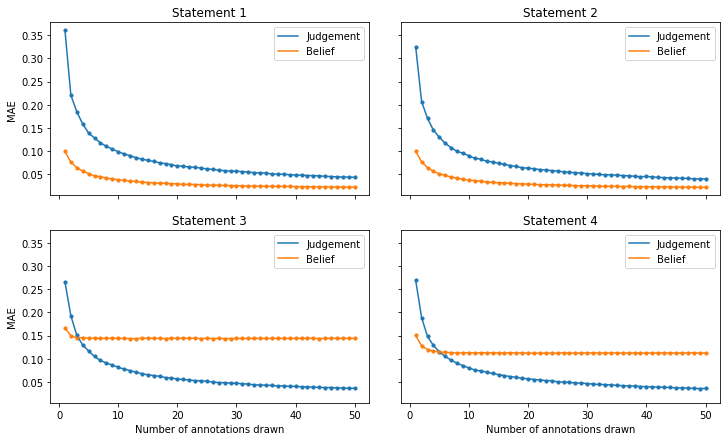

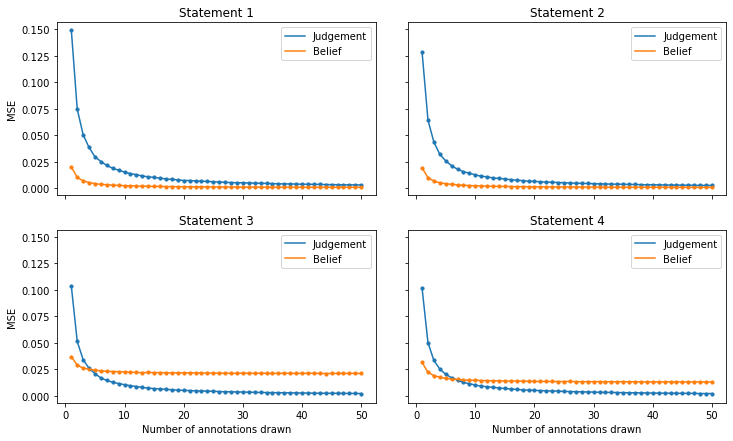

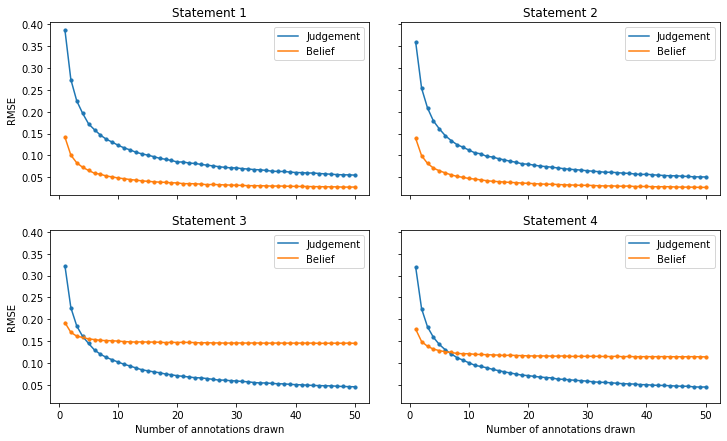

In [75]:
for error_metric in ["MAE", "MSE", "RMSE"]:

    fig, axes = plt.subplots(2,2,figsize=(12,7),sharey=True, sharex=True)
    ax = axes.flatten()

    for i,qnum in enumerate(["1","2","4","5"]):
        
        ax[i].plot(np.arange(1,N_samp+1),list(J_results[qnum][error_metric].values()),label="Judgement")
        ax[i].plot(np.arange(1,N_samp+1),list(B_results[qnum][error_metric].values()), label="Belief")

        ax[i].scatter(np.arange(1,N_samp+1),list(J_results[qnum][error_metric].values()),s=10)
        ax[i].scatter(np.arange(1,N_samp+1),list(B_results[qnum][error_metric].values()),s=10)

        #ax[i].set_title()
        ax[i].legend(loc="upper right")
        ax[i].set_title("Statement "+str(i+1))
    
    
    ax[0].set_ylabel(error_metric)
    ax[2].set_ylabel(error_metric)
    ax[2].set_xlabel("Number of annotations drawn")
    ax[3].set_xlabel("Number of annotations drawn")

    fig.subplots_adjust(wspace=0.1)
        



Text(0.5, 1.0, 'Average errors')

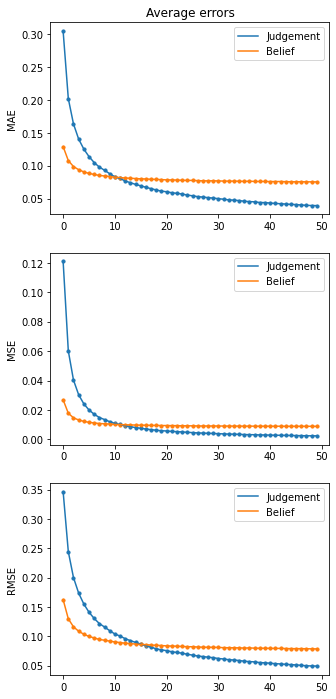

In [74]:

fig, ax = plt.subplots(3,1, figsize=(5,12))
for i, error_metric in enumerate(["MAE", "MSE", "RMSE"]):
    J_avg = np.array([list(J_results["1"][error_metric].values()),
            list(J_results["2"][error_metric].values()),
            list(J_results["4"][error_metric].values()),
            list(J_results["5"][error_metric].values())]
    ).mean(axis=0)

    B_avg = np.array([list(B_results["1"][error_metric].values()),
            list(B_results["2"][error_metric].values()),
            list(B_results["4"][error_metric].values()),
            list(B_results["5"][error_metric].values())]
    ).mean(axis=0)

    ax[i].plot(np.arange(50),J_avg, label="Judgement")
    ax[i].plot(np.arange(50),B_avg, label="Belief")
    ax[i].scatter(np.arange(50),J_avg,s=10)
    ax[i].scatter(np.arange(50),B_avg,s=10)
    ax[i].set_ylabel(error_metric)
    ax[i].legend()
ax[0].set_title("Average errors")